In [1]:
import torch
from torch import nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

 ## What we are covering in this Notebook
 1. Data (prepare and load)
 2. build models
 3. fitting the model to data (training)
 4. making predictionsand evaluting a model
 5. Saving and loading the model
 6. putting it all together

#1 Data (Preparing and Loading)

* Excel spreadsheet
* Images of any kind
* Videos
* Audio Like songs or podcast
* DNA


In [2]:
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X+bias # Linear regression formual (y = a + mx)
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
len(X), len(y)

(50, 50)

## Splitting the data into training and test sets (one of the most important concepts in machine learning in general)

1. Training set - Materials (the model learns from this data)
2. validation set - Practice (the model gets tuned on this data)
3. Test set - Final (the model gets evaluated on this data to test what it has learned )

Let's create a training and test set with our data

In [6]:
# create a train/test split
train_split = int(0.8 * len(X)) # len of X is 50 and 0.8*50 = 40

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)
# train_split

(40, 40, 10, 10)

In [7]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [32]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

In the above graphs we are training the model on the basis of training data and then predicting the values of the y from the input x test data and to evalute the model the we check the predictions with the value of y

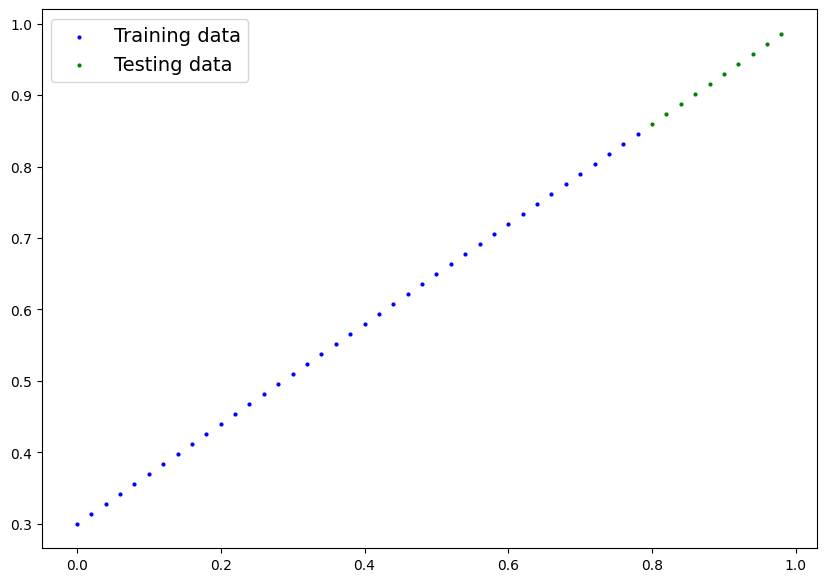

In [33]:
plot_predictions();


## 2. Build Model

Two main algorithms
1. Gradient Descent
2. Backpropagation


In [34]:
# Create a linear regression model class

class LinearRegressionModel(nn.Module): # <- almost everything is PyTorch is inherited fro nn.module
  def __init__(self):                   # constructor
    super().__init__()
    self.weights = nn.Parameter(torch.rand(1, requires_grad= True, dtype = torch.float))  # parameter 1
    self.bias = nn.Parameter(torch.rand(1, requires_grad= True, dtype = torch.float))     # parameter 2

    #forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "X" is the input data
    return self.weights * x + self.bias               # formula of linear regression   (decide kar rhe hai kya hoga )


## PyTorch model building essentials

* torch.nn - contains all of thr building for computational graphs
* torch.nn.Parameter - what parameters should our model try and learn, often a pytoch layer from torch.nn will set these for us
* torch.nn.Module - the base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this is where the optimers in PyTorch live, they will help with gradient descent
* def forward() - all nn.Module subclasses require you to overwtite forward, this method defines what happens in the forward computation


In [78]:
# create a random seed
torch.manual_seed(42)

model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [79]:
# list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

## making prediction using `torch.inference_mode()`
To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`.


When we pass data through our model, its going to run it through the `forward()` method

In [80]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

In [81]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

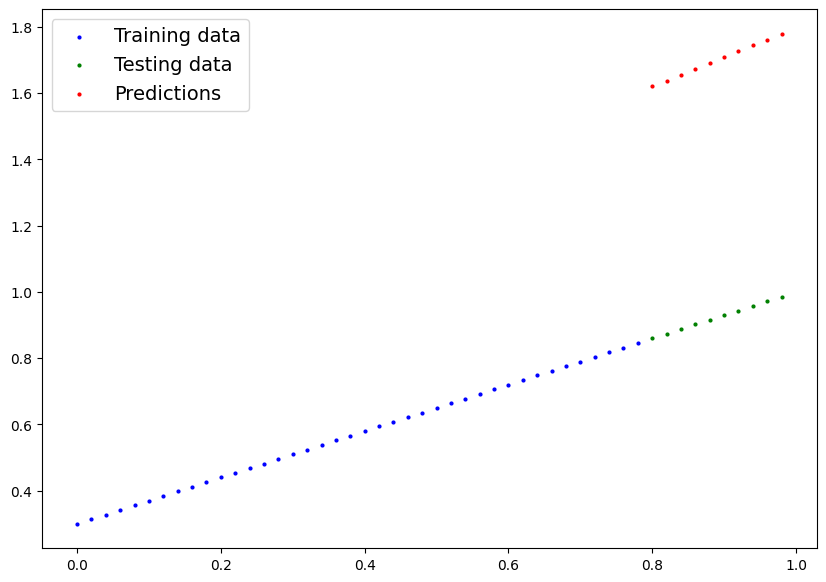

In [82]:
plot_predictions(predictions = y_preds)

# 3 Train Model
The whole idea is for a model to move from unknown paramteters to some known parameters


or in other words from a poor representation of the data to a better representation of the data.

one way to measure how poor or how wrong your model predictions are is to use a Loss Function

* Note: Loss Function may also be called cost function in different areas. for our case, we're going to refer to it as a loss function

**Loss Function:** A functions to measure how wrong yout model's predictions are to the ideal ouputs, lower is better.

**Optimizer:** Takes ito account the loss of a model and adjusts the model's paramteter(eg weight & bias)


In [83]:
# setup a loss function
loss_fn = nn.L1Loss()
loss_fn

L1Loss()

In [84]:
# setup an optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.1)   # lr = learning rate
 # optimizer known as SGD. we could have used some other also.

## Building a training Loop in PyTorch

1. Loop throigh the data
2. forward pass (this involves data moving through out model's `forward()` functions) - aslo called forward propagation.
3. Calculate the loss (compare forward pass predictions to ground truth labels)
4. Optimizer zero grad
5. Loss backward - move backwards through the netwroks to calculate the gradients of each of the parameters of our models with respect to the loss. (**Backpropagation**)
6. Optimizer step - use the optimizer to adjust our model's paramaters to try and improve the loss. (**Gradient Descent**)


In [85]:
torch.manual_seed(42)

epochs = 200

# Tracking Experiment

epoch_count = []
loss_values = []
test_loss_values = []

# 1 Loop through the data
for epoch in range(epochs):
  #set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients (training mode)

  #1. Forward Pass
  y_pred = model_0(X_train)  #(model k de diya)

  #2. Calculate the loss
  loss = loss_fn(y_pred, y_train)  # the order matters here, i.e first predicted values and then target values
  # print(f"Loss is: {loss}")

  #3. Optimizer 0 grad
  optimizer.zero_grad()  # all gradient to zero

  #4. Perform Backpropagation on the loss
  loss.backward()  # calcuates the gradient

  #5. Step the optimizer
  optimizer.step()   # weights update

  ## Testing
  model_0.eval() # turns off gradient tracking
  with torch.inference_mode():
  #with torch.no_grad():
    # do forward pass
    test_pred = model_0(X_test)

    #calculate the loss
    test_loss = loss_fn(test_pred, y_test)
  if epoch%10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Test: {loss} | Test Loss: {test_loss}")
    print(model_0.state_dict())

Epoch: 0 | Test: 0.6860889196395874 | Test Loss: 0.642513632774353
OrderedDict([('weights', tensor([0.8433])), ('bias', tensor([0.8150]))])
Epoch: 10 | Test: 0.08426602929830551 | Test Loss: 0.01932867243885994
OrderedDict([('weights', tensor([0.6768])), ('bias', tensor([0.3400]))])
Epoch: 20 | Test: 0.08426602929830551 | Test Loss: 0.01932867243885994
OrderedDict([('weights', tensor([0.6768])), ('bias', tensor([0.3400]))])
Epoch: 30 | Test: 0.08426602929830551 | Test Loss: 0.01932867243885994
OrderedDict([('weights', tensor([0.6768])), ('bias', tensor([0.3400]))])
Epoch: 40 | Test: 0.08426602929830551 | Test Loss: 0.01932867243885994
OrderedDict([('weights', tensor([0.6768])), ('bias', tensor([0.3400]))])
Epoch: 50 | Test: 0.08426602929830551 | Test Loss: 0.01932867243885994
OrderedDict([('weights', tensor([0.6768])), ('bias', tensor([0.3400]))])
Epoch: 60 | Test: 0.08426602929830551 | Test Loss: 0.01932867243885994
OrderedDict([('weights', tensor([0.6768])), ('bias', tensor([0.3400])

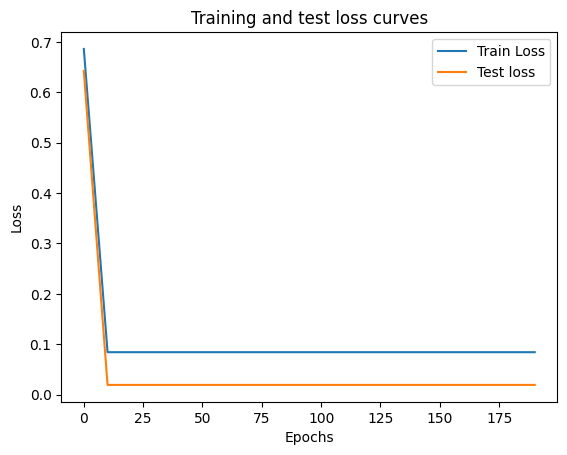

In [87]:
plt.plot(epoch_count, np.array(torch.tensor(loss_values).cpu().numpy()), label = "Train Loss")
plt.plot(epoch_count,test_loss_values, label = "Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [88]:
with torch.inference_mode():
  y_preds_new = model_0(y_test)

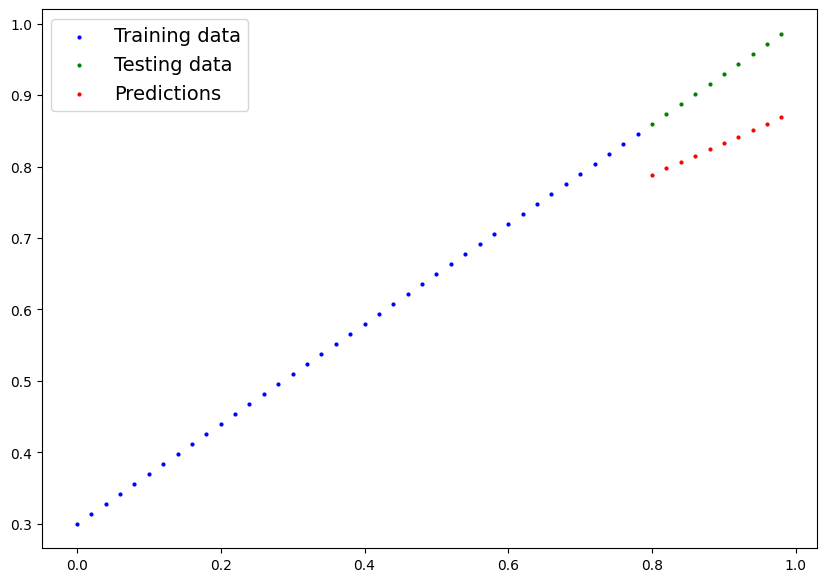

In [89]:
plot_predictions(predictions = y_preds_new);

### Saving a model in PyTorch

There are three main methods you shoud for saving and loading the model in PyTorch

1. `torch.save()` - This allows us to save the PyTorch code in Python pickle format.
2. `torch.load()` - Allows you load a saved PyTorch object.
3. torch.nn.Module.load_state_dict()` - This allows you to load a models saved state dictionary


In [91]:
#saving our pytorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models") # name of the directory
MODEL_PATH.mkdir(parents = True, exist_ok = True)  # exist_ok - will work even if the directory exists

# 2. Create a model save path
MODEL_NAME = "01_Pytorch_Workflow.pth"  # pyhton objects are saved with an extension of pth
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
torch.save(obj = model_0.state_dict(), f = MODEL_SAVE_PATH)

MODEL_SAVE_PATH


PosixPath('models/01_Pytorch_Workflow.pth')

### Loading a PyTorch model
since we saved our model's `state.dict()` rather than the entrie model, we'll create a new instance of our model class and `state_dict()` into that

In [92]:
loaded_model_0 = LinearRegressionModel()

# load the saved state.dict of model_0 (this will update our new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

<All keys matched successfully>